In [28]:
#importamos librerias
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#leemos 'internet'y lo imprimimos
df = pd.read_excel('Internet.xlsx')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18864 non-null  object 
 1   Localidad         18864 non-null  object 
 2   link Indec        18863 non-null  object 
 3   Velocidad (Mbps)  18864 non-null  object 
 4   Provincia         18864 non-null  float64
 5   Accesos           18857 non-null  float64
dtypes: float64(2), object(4)
memory usage: 884.4+ KB


,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


In [45]:
#procedemos a eliminar las filas que contengan 'Sin Datos'
filas_a_eliminar = df[df['Velocidad (Mbps)'] == 'Sin Datos'].index
df.drop(filas_a_eliminar, inplace=True)

#convertimos la columna 'Velocidad (Mbps)' a numérico
df['Velocidad (Mbps)'] = pd.to_numeric(df['Velocidad (Mbps)'], errors='coerce')

print(f"Número de filas después de eliminar 'Sin Datos': {len(df)}")
print(f"Número de NaN en 'Velocidad (Mbps)': {df['Velocidad (Mbps)'].isnull().sum()}")
print(df['Velocidad (Mbps)'].dtype)

#convertimos el int64 en float64 por si usamos decimales en un futuro
df['Velocidad (Mbps)'] = df['Velocidad (Mbps)'].astype('float64')
print(df['Velocidad (Mbps)'].dtype)

Número de filas después de eliminar 'Sin Datos': 18726
Número de NaN en 'Velocidad (Mbps)': 0
int64
float64


In [46]:
#imprimimos para ver como va quedando
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18726 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18726 non-null  object 
 1   Localidad         18726 non-null  object 
 2   link Indec        18726 non-null  object 
 3   Velocidad (Mbps)  18726 non-null  float64
 4   Provincia         18726 non-null  float64
 5   Accesos           18719 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.0+ MB


In [47]:
#notamos que la columna 'Accesos' es la única que queda con valores nulos
print(df['Accesos'].isnull().sum())

#la columna 'Accesos' tiene 7 valores nulos, es insignificante y vamos a eliminarlas
df.dropna(subset=['Accesos'], inplace=True)
print(f"Número de filas después de eliminar NaN en 'Accesos': {len(df)}")
print(df['Accesos'].isnull().sum())

7
Número de filas después de eliminar NaN en 'Accesos': 18719
0


In [48]:
#usando el método del IQR para 'Velocidad (Mbps)'
Q1_velocidad = df['Velocidad (Mbps)'].quantile(0.25)
Q3_velocidad = df['Velocidad (Mbps)'].quantile(0.75)
IQR_velocidad = Q3_velocidad - Q1_velocidad
lower_bound_velocidad = Q1_velocidad - 1.5 * IQR_velocidad
upper_bound_velocidad = Q3_velocidad + 1.5 * IQR_velocidad
outliers_velocidad = df[(df['Velocidad (Mbps)'] < lower_bound_velocidad) | (df['Velocidad (Mbps)'] > upper_bound_velocidad)]
print("\n--- Outliers en Velocidad (Mbps) (IQR) ---")
print(outliers_velocidad.head())
print(f"Número de outliers: {len(outliers_velocidad)}")

#usando el método del IQR para 'Accesos'
Q1_accesos = df['Accesos'].quantile(0.25)
Q3_accesos = df['Accesos'].quantile(0.75)
IQR_accesos = Q3_accesos - Q1_accesos
lower_bound_accesos = Q1_accesos - 1.5 * IQR_accesos
upper_bound_accesos = Q3_accesos + 1.5 * IQR_accesos
outliers_accesos = df[(df['Accesos'] < lower_bound_accesos) | (df['Accesos'] > upper_bound_accesos)]
print("\n--- Outliers en Accesos (IQR) ---")
print(outliers_accesos.head())
print(f"Número de outliers: {len(outliers_accesos)}")


--- Outliers en Velocidad (Mbps) (IQR) ---
Empty DataFrame
Columns: [Partido, Localidad, link Indec, Velocidad (Mbps), Provincia, Accesos]
Index: []
Número de outliers: 0

--- Outliers en Accesos (IQR) ---
         Partido   Localidad              link Indec  Velocidad (Mbps)  \
9   BUENOS AIRES  25 de Mayo              25 de Mayo         6854100.0   
11  BUENOS AIRES  25 de Mayo              25 de Mayo         6854100.0   
13  BUENOS AIRES  25 de Mayo              25 de Mayo         6854100.0   
15  BUENOS AIRES  25 de Mayo              25 de Mayo         6854100.0   
37  BUENOS AIRES  25 de Mayo  Norberto de la Riestra         6854060.0   

    Provincia  Accesos  
9        20.0   1796.0  
11       30.0   1501.0  
13       50.0    647.0  
15      100.0    693.0  
37        6.0    914.0  
Número de outliers: 2890


In [49]:
#leemos 'accesos_por_tecnologia'y lo imprimimos
df_accesos = pd.read_excel('accesos_por_tecnologia.xlsx')
df_accesos.info()
df_accesos.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           24 non-null     int64 
 1   Trimestre     24 non-null     int64 
 2   Provincia     24 non-null     object
 3   ADSL          24 non-null     int64 
 4   Cablemodem    24 non-null     int64 
 5   Fibra óptica  24 non-null     int64 
 6   Wireless      24 non-null     int64 
 7   Otros         24 non-null     int64 
 8   Total         24 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ KB


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055,2722466,1849476,138638,64745,4989380
1,2024,2,Capital Federal,54102,1144781,230402,4493,29821,1463599
2,2024,2,Catamarca,4951,10303,58355,1384,81,75074
3,2024,2,Chaco,9448,57935,68944,8407,2358,147092
4,2024,2,Chubut,25955,80704,26516,31118,9930,174223


In [50]:
#leemos 'penetracion_poblacion'y lo imprimimos
df_penetracion = pd.read_excel('penetracion_poblacion.xlsx')
df_penetracion.info()
df_penetracion.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       24 non-null     int64  
 1   Trimestre                 24 non-null     int64  
 2   Provincia                 24 non-null     object 
 3   Accesos por cada 100 hab  24 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 900.0+ bytes


,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [51]:
# 1. Estadísticas Descriptivas Clave
print("--- Estadísticas Descriptivas ---")
print(df[['Velocidad (Mbps)', 'Provincia', 'Accesos']].describe(percentiles=[0.25, 0.5, 0.75]))
print("\n--- Mediana ---")
print(df[['Velocidad (Mbps)', 'Provincia', 'Accesos']].median())

--- Estadísticas Descriptivas ---
       Velocidad (Mbps)     Provincia        Accesos
count      1.871900e+04  18719.000000   18719.000000
mean       3.268274e+07     67.260618     608.884182
std        2.960693e+07    179.453812    6269.974250
min        2.000010e+06      0.000000       0.000000
25%        6.560010e+06      3.000000       4.000000
50%        1.416106e+07     10.000000      27.000000
75%        5.808404e+07     30.000000     181.000000
max        9.401402e+07   1000.000000  576789.000000

--- Mediana ---
Velocidad (Mbps)    14161060.0
Provincia                 10.0
Accesos                   27.0
dtype: float64


                    Velocidad (Mbps)                         Accesos         \
                                mean      median count          mean median   
Partido                                                                       
BUENOS AIRES            6.455919e+06   6441030.0  7128    684.113215   42.0   
CABA                    2.000010e+06   2000010.0    53  27731.528302  240.0   
CATAMARCA               1.006864e+07  10070140.0   216    347.546296    7.0   
CHACO                   2.208000e+07  22077040.0   395    367.911392   25.0   
CHUBUT                  2.604468e+07  26035040.0   302    574.135762   20.5   
CORDOBA                 1.409356e+07  14098015.0  2200    493.131364   21.0   
CORRIENTES              1.808511e+07  18084020.0   323    487.012384   18.0   
ENTRE RIOS              3.006340e+07  30077030.0   738    388.766938   25.0   
FORMOSA                 3.403436e+07  34035100.0   295    212.644068   17.0   
JUJUY                   3.805357e+07  38049037.5   2

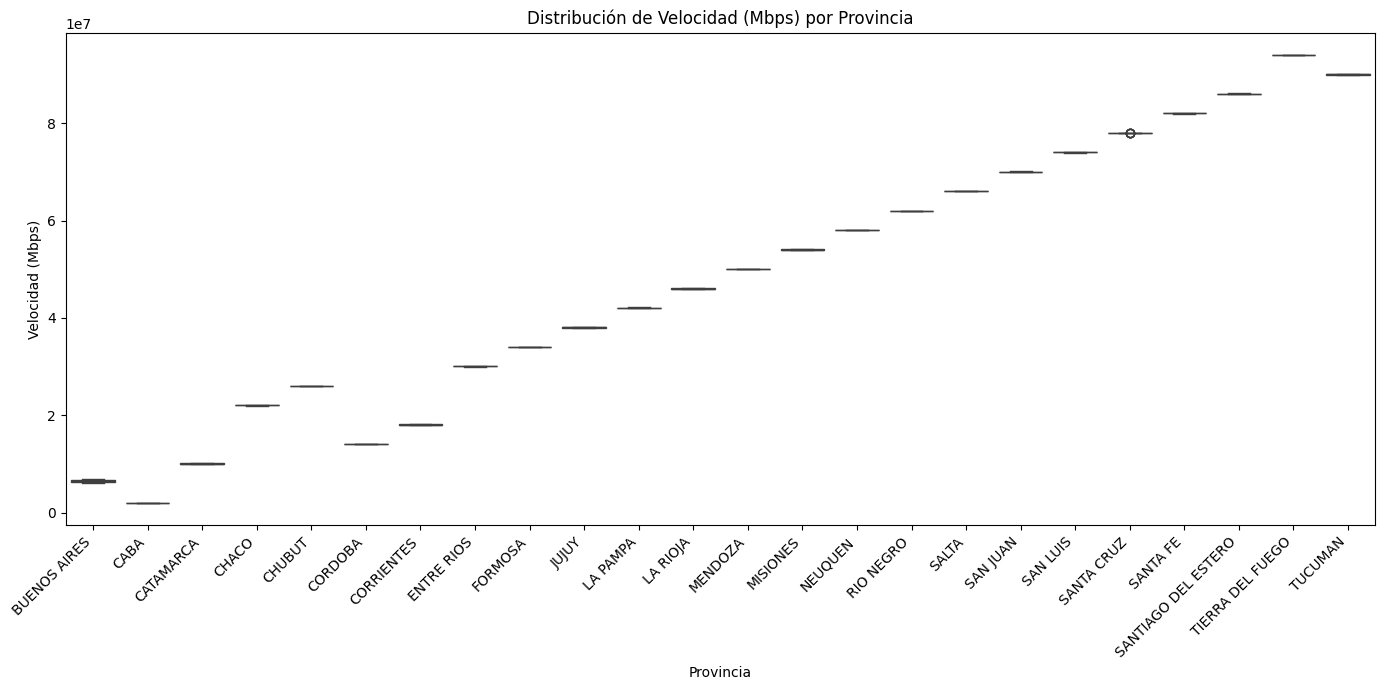

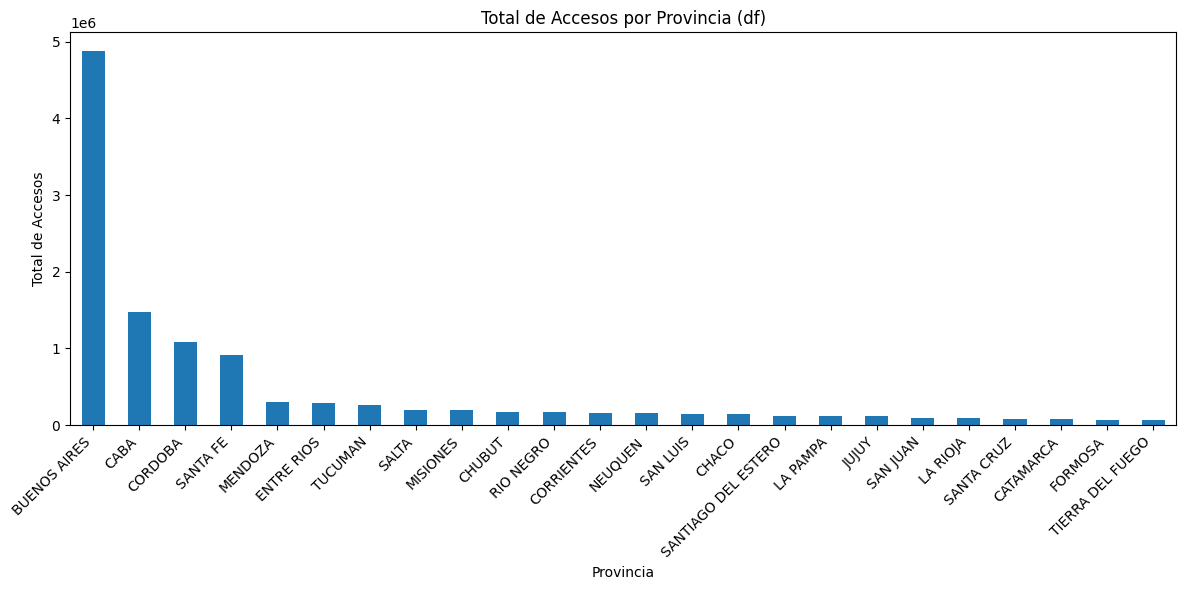

In [62]:
# 2. Análisis del DataFrame Principal

# Análisis por Provincia
provincia_stats = df.groupby('Partido')[['Velocidad (Mbps)', 'Accesos']].agg(['mean', 'median', 'count'])
print(provincia_stats)

# Box plots comparativos de Velocidad por Provincia
plt.figure(figsize=(14, 7))
sns.boxplot(x='Partido', y='Velocidad (Mbps)', data=df)
plt.title('Distribución de Velocidad (Mbps) por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad (Mbps)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de barras del Total de Accesos por Provincia
accesos_por_provincia = df.groupby('Partido')['Accesos'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
accesos_por_provincia.plot(kind='bar')
plt.title('Total de Accesos por Provincia (df)')
plt.xlabel('Provincia')
plt.ylabel('Total de Accesos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


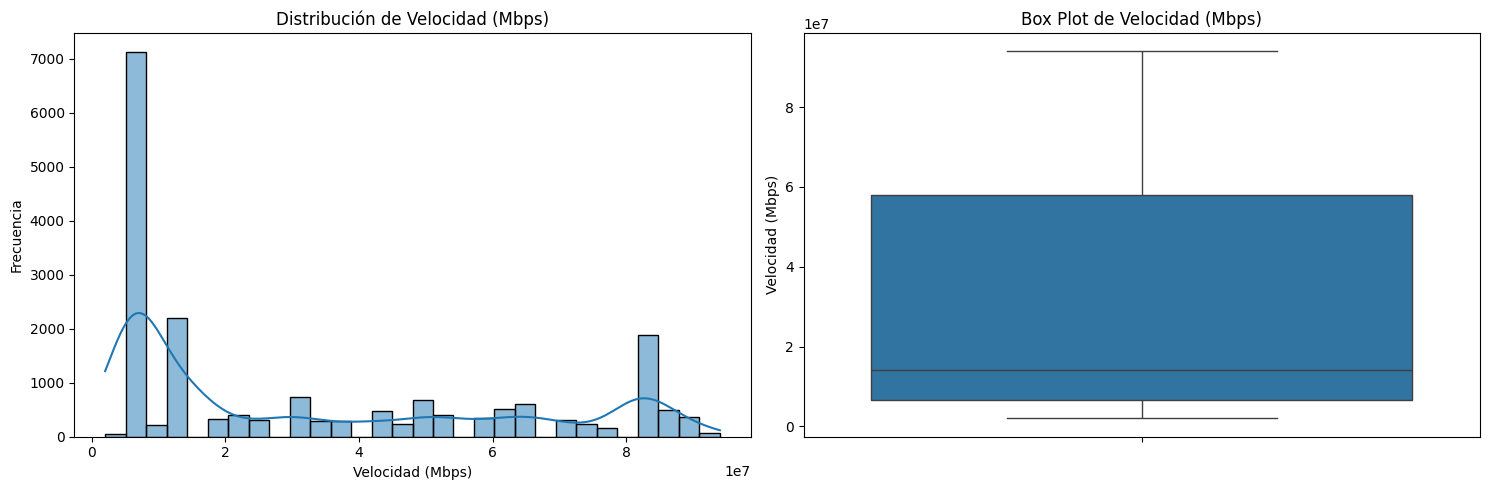

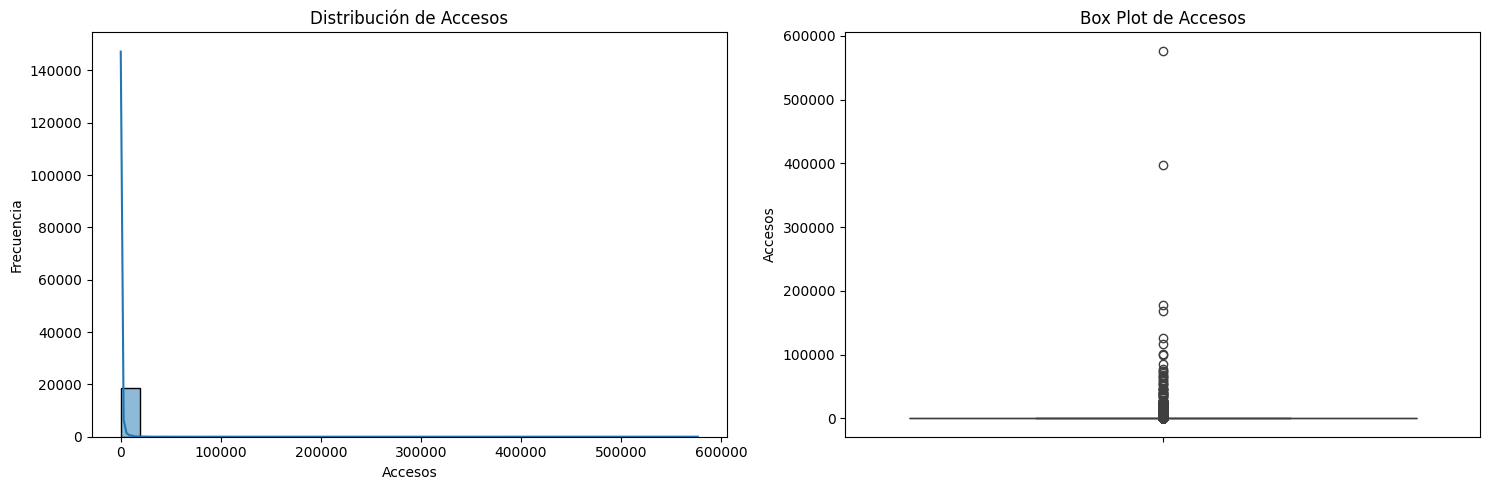

In [30]:
# 3. Distribución de Variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Velocidad (Mbps)'], bins=30, kde=True)
plt.title('Distribución de Velocidad (Mbps)')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Velocidad (Mbps)'])
plt.title('Box Plot de Velocidad (Mbps)')
plt.ylabel('Velocidad (Mbps)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Accesos'], bins=30, kde=True)
plt.title('Distribución de Accesos')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Accesos'])
plt.title('Box Plot de Accesos')
plt.ylabel('Accesos')

plt.tight_layout()
plt.show()

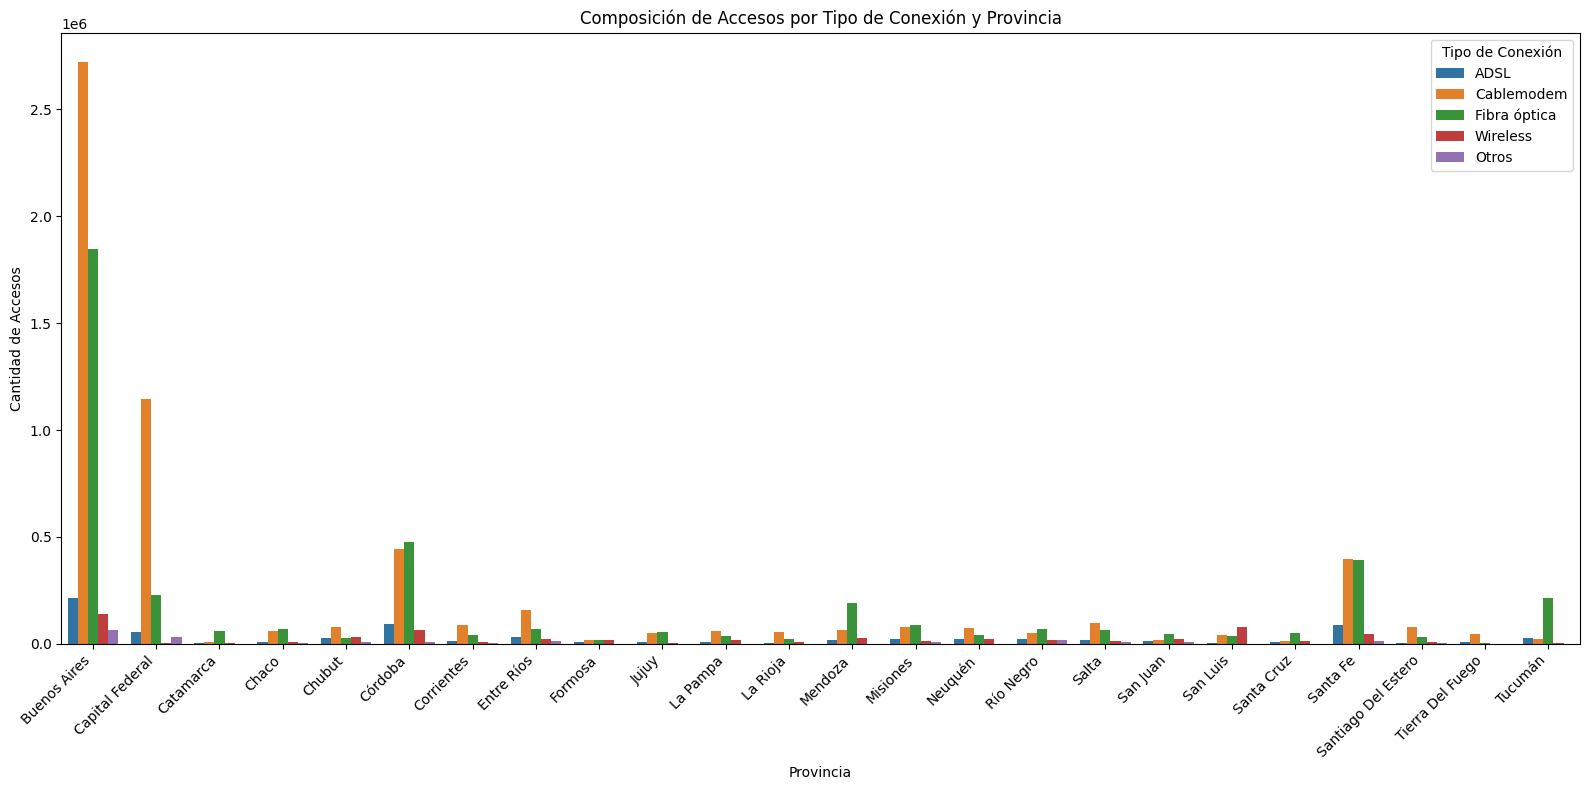


--- Tecnología Predominante por Provincia ---
Provincia
Buenos Aires             Cablemodem
Capital Federal          Cablemodem
Catamarca              Fibra óptica
Chaco                  Fibra óptica
Chubut                   Cablemodem
Córdoba                Fibra óptica
Corrientes               Cablemodem
Entre Ríos               Cablemodem
Formosa                Fibra óptica
Jujuy                  Fibra óptica
La Pampa                 Cablemodem
La Rioja                 Cablemodem
Mendoza                Fibra óptica
Misiones               Fibra óptica
Neuquén                  Cablemodem
Río Negro              Fibra óptica
Salta                    Cablemodem
San Juan               Fibra óptica
San Luis                   Wireless
Santa Cruz             Fibra óptica
Santa Fe                 Cablemodem
Santiago Del Estero      Cablemodem
Tierra Del Fuego         Cablemodem
Tucumán                Fibra óptica
dtype: object


In [55]:
# 4. Análisis del DataFrame de Accesos por Provincia 

# Composición de tipos de conexión por provincia
df_accesos_melted = df_accesos.melt(id_vars=['Año', 'Trimestre', 'Provincia'],
                                    value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'],
                                    var_name='Tipo de Conexión',
                                    value_name='Cantidad')

plt.figure(figsize=(16, 8))
sns.barplot(x='Provincia', y='Cantidad', hue='Tipo de Conexión', data=df_accesos_melted)
plt.title('Composición de Accesos por Tipo de Conexión y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Accesos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar tecnología predominante
tecnologia_predominante = df_accesos.set_index('Provincia')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].idxmax(axis=1)
print("\n--- Tecnología Predominante por Provincia ---")
print(tecnologia_predominante)


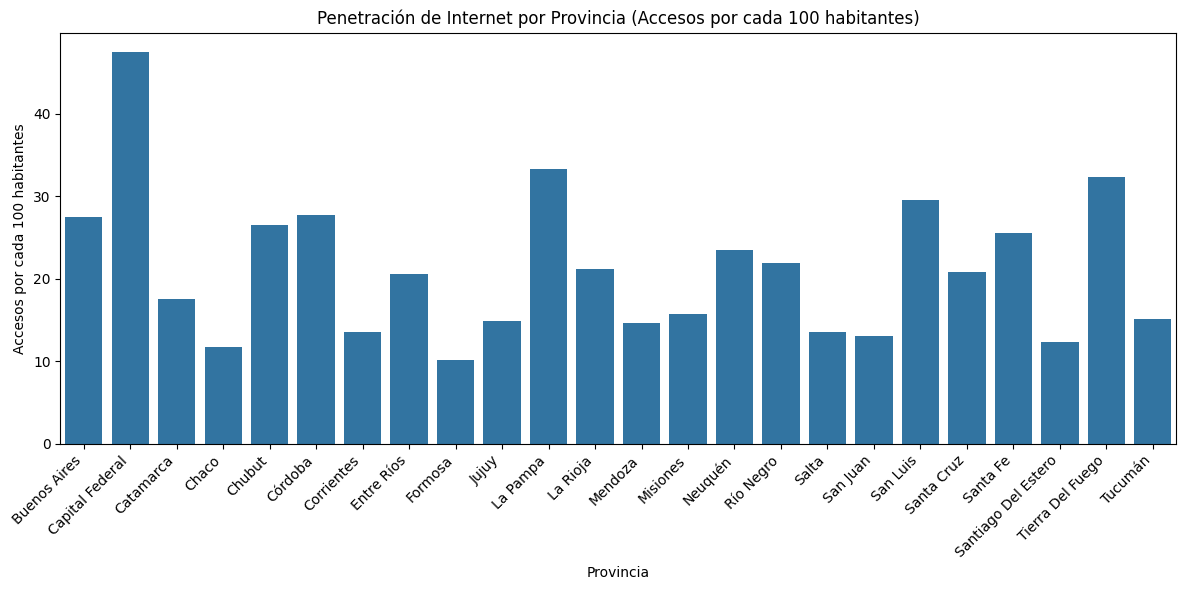


--- Provincias con Mayor Penetración ---
     Año  Trimestre         Provincia  Accesos por cada 100 hab
1   2024          2   Capital Federal                     47.44
10  2024          2          La Pampa                     33.33
22  2024          2  Tierra Del Fuego                     32.28
18  2024          2          San Luis                     29.59
5   2024          2           Córdoba                     27.79

--- Provincias con Menor Penetración ---
     Año  Trimestre            Provincia  Accesos por cada 100 hab
16  2024          2                Salta                     13.49
17  2024          2             San Juan                     13.03
21  2024          2  Santiago Del Estero                     12.33
3   2024          2                Chaco                     11.78
8   2024          2              Formosa                     10.10


In [56]:
# 5. Análisis del DataFrame de Penetración por Provincia

# Visualización de la penetración por provincia
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Accesos por cada 100 hab', data=df_penetracion)
plt.title('Penetración de Internet por Provincia (Accesos por cada 100 habitantes)')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 habitantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar provincias con mayor y menor penetración
penetracion_sorted = df_penetracion.sort_values(by='Accesos por cada 100 hab', ascending=False)
print("\n--- Provincias con Mayor Penetración ---")
print(penetracion_sorted.head())
print("\n--- Provincias con Menor Penetración ---")
print(penetracion_sorted.tail())


--- Estadísticas por Provincia ---
                    Velocidad (Mbps)                                 Accesos  \
                                mean      median           sum          mean   
Partido                                                                        
BUENOS AIRES            6.455919e+06   6441030.0  4.601779e+10    684.113215   
CABA                    2.000010e+06   2000010.0  1.060005e+08  27731.528302   
CATAMARCA               1.006864e+07  10070140.0  2.174826e+09    347.546296   
CHACO                   2.208000e+07  22077040.0  8.721600e+09    367.911392   
CHUBUT                  2.604468e+07  26035040.0  7.865492e+09    574.135762   
CORDOBA                 1.409356e+07  14098015.0  3.100584e+10    493.131364   
CORRIENTES              1.808511e+07  18084020.0  5.841490e+09    487.012384   
ENTRE RIOS              3.006340e+07  30077030.0  2.218679e+10    388.766938   
FORMOSA                 3.403436e+07  34035100.0  1.004014e+10    212.644068   
JUJU

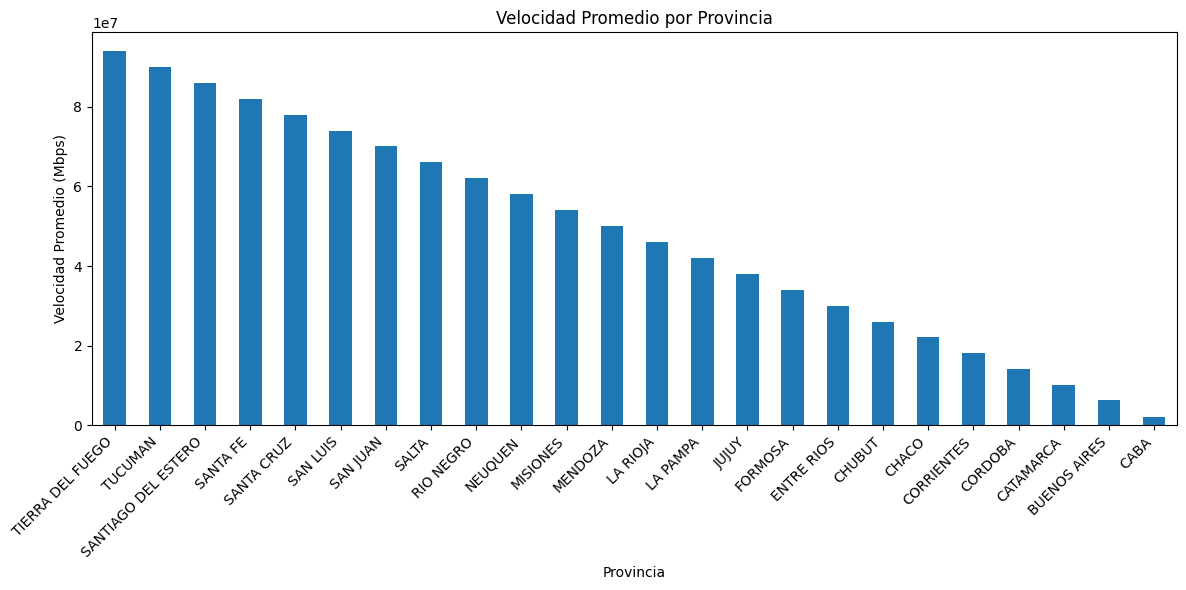

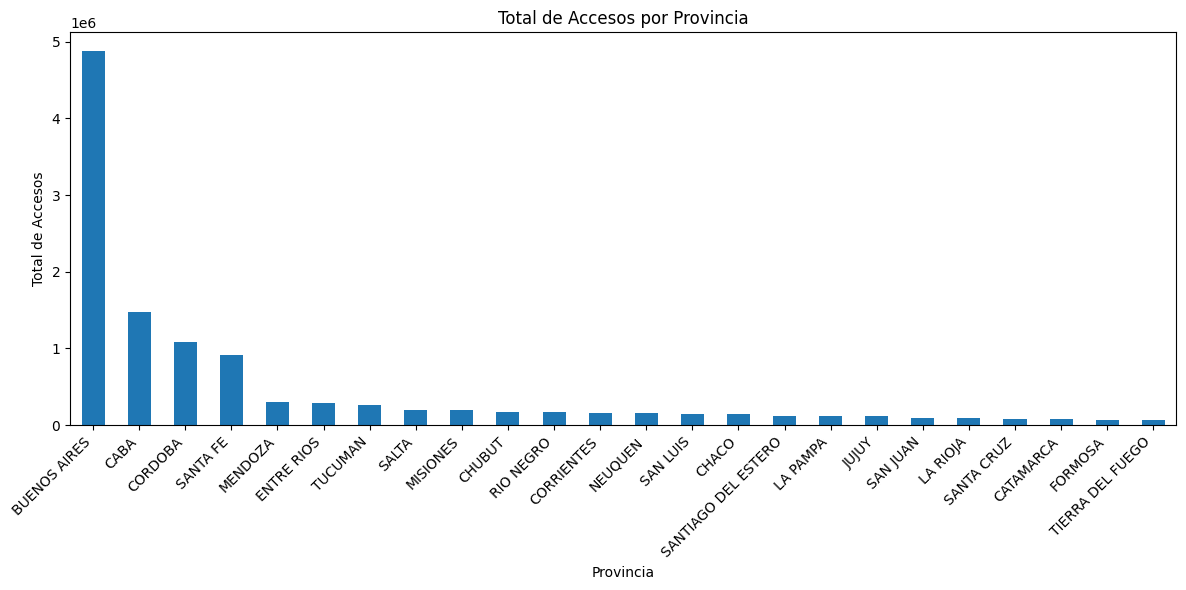


--- Top 10 Localidades por Velocidad Promedio ---
Localidad
Ushuaia           9.401402e+07
Río Grande        9.400701e+07
Yerba Buena       9.011903e+07
Trancas           9.011203e+07
Tafí Viejo        9.010507e+07
Tafí del Valle    9.009802e+07
Simoca            9.009104e+07
Monteros          9.007005e+07
Lules             9.006304e+07
Leales            9.005603e+07
Name: Velocidad (Mbps), dtype: float64

--- Bottom 10 Localidades por Velocidad Promedio ---
Localidad
Berazategui                        6.091010e+06
Benito Juárez                      6.084026e+06
Arrecifes                          6.077012e+06
Baradero                           6.070019e+06
Balcarce                           6.063029e+06
Bahía Blanca                       6.056016e+06
Azul                               6.049024e+06
Alberti                            6.021020e+06
Adolfo Gonzales Chaves             6.014018e+06
Ciudad Autónoma de Buenos Aires    2.000010e+06
Name: Velocidad (Mbps), dtype: float64

--- To

In [31]:
# 6. Análisis por Categorías # Acción: Estos análisis y visualizaciones te darán KPIs geográficos.

# Velocidad y Accesos por Provincia
print("\n--- Estadísticas por Provincia ---")
provincia_stats = df.groupby('Partido')[['Velocidad (Mbps)', 'Accesos']].agg(['mean', 'median', 'sum'])
print(provincia_stats)

# Visualización: Velocidad promedio por Provincia
plt.figure(figsize=(12, 6))
provincia_stats['Velocidad (Mbps)', 'mean'].sort_values(ascending=False).plot(kind='bar')
plt.title('Velocidad Promedio por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualización: Total de Accesos por Provincia
plt.figure(figsize=(12, 6))
provincia_stats['Accesos', 'sum'].sort_values(ascending=False).plot(kind='bar')
plt.title('Total de Accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Total de Accesos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top/Bottom Localidades (basado en velocidad promedio y total de accesos)
localidad_stats_velocidad = df.groupby('Localidad')['Velocidad (Mbps)'].mean().sort_values(ascending=False)
print("\n--- Top 10 Localidades por Velocidad Promedio ---")
print(localidad_stats_velocidad.head(10))
print("\n--- Bottom 10 Localidades por Velocidad Promedio ---")
print(localidad_stats_velocidad.tail(10))

localidad_stats_accesos = df.groupby('Localidad')['Accesos'].sum().sort_values(ascending=False)
print("\n--- Top 10 Localidades por Total de Accesos ---")
print(localidad_stats_accesos.head(10))
print("\n--- Bottom 10 Localidades por Total de Accesos ---")
print(localidad_stats_accesos.tail(10))

In [63]:
#guardamos el DataFrame principal (df)
df.to_csv('df_principal.csv', index=False)
print("DataFrame 'df' guardado como 'df_principal.csv'")

#guardamos el DataFrame de accesos por provincia (df_accesos)
df_accesos.to_csv('accesos_por_provincia.csv', index=False)
print("DataFrame 'df_accesos' guardado como 'accesos_por_provincia.csv'")

#guardamos el DataFrame de penetración por provincia (df_penetracion)
df_penetracion.to_csv('penetracion_por_provincia.csv', index=False)
print("DataFrame 'df_penetracion' guardado como 'penetracion_por_provincia.csv'")

DataFrame 'df' guardado como 'df_principal.csv'
DataFrame 'df_accesos' guardado como 'accesos_por_provincia.csv'
DataFrame 'df_penetracion' guardado como 'penetracion_por_provincia.csv'
